<a href="https://colab.research.google.com/github/zuulaika/Projet-python/blob/main/Criminalit%C3%A9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taux de criminalité 2019-2024

---



In [ ]:
!pip install cartiflette

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
from geo_utils import load_and_reproject_departements
import pandas as pd
departements_lambert93 = load_and_reproject_departements()
import matplotlib.pyplot as plt

In [ ]:

url_criminalite = "https://www.data.gouv.fr/fr/datasets/r/8debb975-02da-4bfc-808f-42d18ad76d0b"

# Charger le jeu de données dans un DataFrame, en spécifiant le séparateur ';'
df_criminalite = pd.read_csv(url_criminalite, sep=';')

# Afficher les premières lignes du DataFrame
print(df_criminalite.head())

  Code_departement  Code_region  annee indicateur unite_de_compte  nombre  \
0               01           84   2016  Homicides         Victime       5   
1               02           32   2016  Homicides         Victime      10   
2               03           84   2016  Homicides         Victime       4   
3               04           93   2016  Homicides         Victime       2   
4               05           93   2016  Homicides         Victime       0   

  taux_pour_mille  insee_pop  insee_pop_millesime  insee_log  \
0       0,0078318     638425                 2016     308491   
1       0,0186520     536136                 2016     264180   
2       0,0117861     339384                 2016     206980   
3       0,0123028     162565                 2016     126760   
4       0,0000000     141107                 2016     134647   

   insee_log_millesime  
0                 2016  
1                 2016  
2                 2016  
3                 2016  
4                 2016  




On applique les poids de gravité ('crime_weights') à chaque type de crime dans le DataFrame. Convertir les colonnes pertinentes ('Code_departement', 'taux_pour_mille', 'annee', 'indicateur') aux types appropriés, puis calculer un taux de criminalité pondéré global par département et par année.


In [ ]:

# Affiche les valeurs uniques de la colonne 'indicateur' pour voir les types de crimes disponibles.
print(df_criminalite['indicateur'].unique())

['Homicides' "Tentatives d'homicides" 'Coups et blessures volontaires'
 'Coups et blessures volontaires intrafamiliaux'
 'Autres coups et blessures volontaires' 'Violences sexuelles'
 'Vols avec armes' 'Vols violents sans arme'
 'Vols sans violence contre des personnes' 'Cambriolages de logement'
 'Vols de véhicules' 'Vols dans les véhicules'
 "Vols d'accessoires sur véhicules"
 'Destructions et dégradations volontaires' 'Usage de stupéfiants'
 'Usage de stupéfiants (AFD)' 'Trafic de stupéfiants' 'Escroqueries']


In [ ]:
#On définit des poids à chaque type de crime selon a gravité
crime_weights = {
    'Homicides': 10,
    'Coups et blessures volontaires': 7,
    'Violences sexuelles': 8,
    'Cambriolages': 5,
    'Vols de véhicules': 4,
    'Vols avec violences': 6,
    'Usage de stupéfiants': 3,
    'Trafic de stupéfiants': 9,
    'Destructions et dégradations': 2,
    'Escroqueries': 3,
    'Atteintes à la dignité et à la personnalité': 5,
    'Autres crimes et délits': 1
}


df_criminalite['taux_pour_mille'] = df_criminalite['taux_pour_mille'].str.replace(',', '.', regex=False)
df_criminalite['taux_pour_mille'] = pd.to_numeric(df_criminalite['taux_pour_mille'], errors='coerce')
df_criminalite['Code_departement'] = df_criminalite['Code_departement'].astype(str)
df_criminalite['weight'] = df_criminalite['indicateur'].apply(lambda x: crime_weights.get(x, 0))
df_criminalite['weighted_rate'] = df_criminalite['taux_pour_mille'] * df_criminalite['weight']
df_weighted_crime_rate = df_criminalite.groupby(['Code_departement', 'annee'])['weighted_rate'].sum().reset_index()
df_weighted_crime_rate.rename(columns={'weighted_rate': 'total_weighted_crime_rate'}, inplace=True)
print("\nFirst few rows of df_weighted_crime_rate:")
print(df_weighted_crime_rate.head())
print("\nInfo of df_weighted_crime_rate:")
print(df_weighted_crime_rate.info())


First few rows of df_weighted_crime_rate:
  Code_departement  annee  total_weighted_crime_rate
0               01   2016                  49.958883
1               01   2017                  46.677547
2               01   2018                  48.163005
3               01   2019                  51.422984
4               01   2020                  50.491294

Info of df_weighted_crime_rate:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Code_departement           909 non-null    object 
 1   annee                      909 non-null    int64  
 2   total_weighted_crime_rate  909 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.4+ KB
None


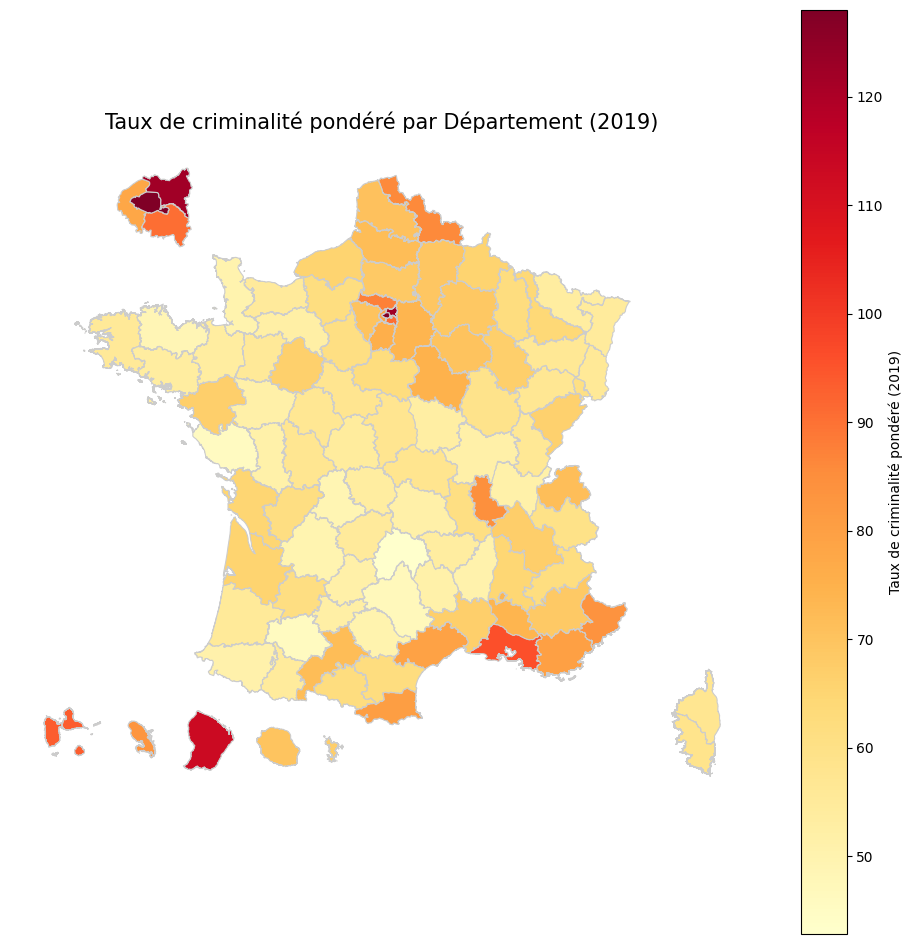

In [ ]:
import matplotlib.pyplot as plt

# Filtre les données pour l'année 2019
merged_data_crime_2019 = merged_data_crime[merged_data_crime['annee'] == 2019]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Trace la carte choroplèthe
merged_data_crime_2019.plot(
    column='total_weighted_crime_rate',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Taux de criminalité pondéré (2019)", 'orientation': "vertical"}
)

ax.set_title("Taux de criminalité pondéré par Département (2019)", fontsize=15)
ax.set_axis_off()
plt.show()

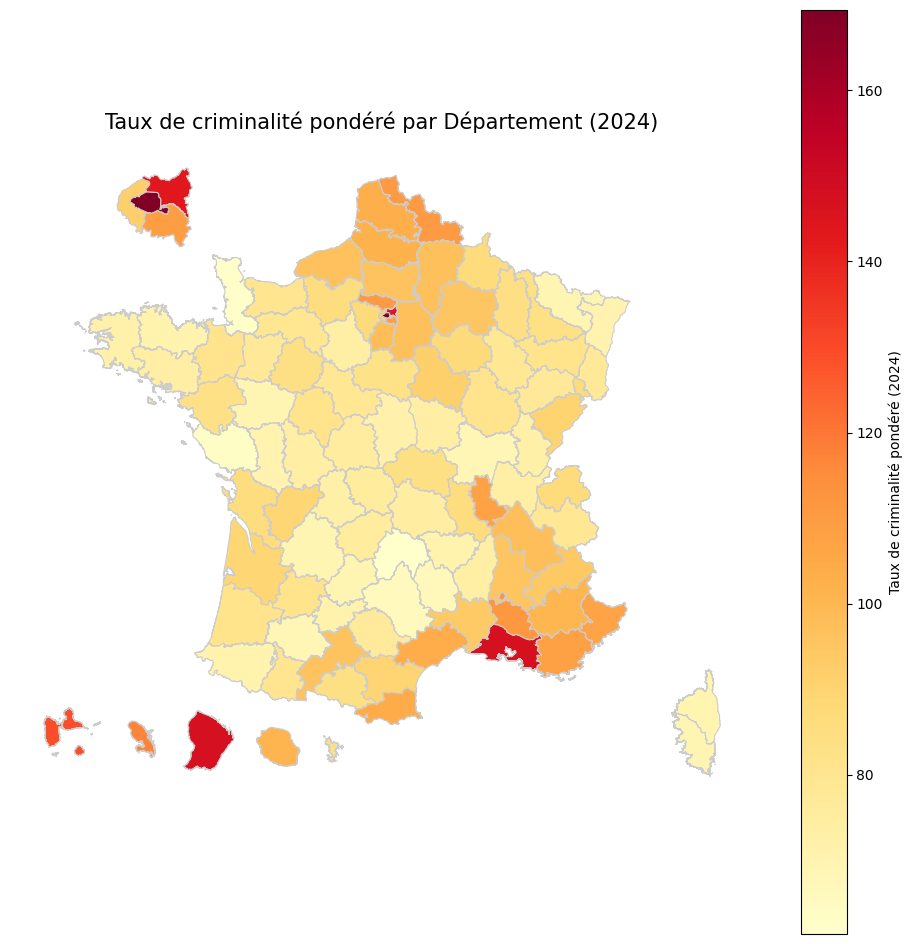

In [ ]:
import matplotlib.pyplot as plt

# Filtre les données pour l'année 2024
merged_data_crime_2024 = merged_data_crime[merged_data_crime['annee'] == 2024]


fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Trace la carte choroplèthe
merged_data_crime_2024.plot(
    column='total_weighted_crime_rate',
    cmap='YlOrRd',
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Taux de criminalité pondéré (2024)", 'orientation': "vertical"}
)

ax.set_title("Taux de criminalité pondéré par Département (2024)", fontsize=15)
ax.set_axis_off()
plt.show()

In [ ]:
merged_data_crime = departements_lambert93.merge(df_weighted_crime_rate, left_on='INSEE_DEP', right_on='Code_departement', how='left')

print("\nFirst few rows of merged_data_crime:")
print(merged_data_crime.head())
print("\nInfo of merged_data_crime:")
print(merged_data_crime.info())


First few rows of merged_data_crime:
  INSEE_DEP    PAYS LIBELLE_DEPARTEMENT  POPULATION  \
0        43  France         Haute-Loire      227570   
1        43  France         Haute-Loire      227570   
2        43  France         Haute-Loire      227570   
3        43  France         Haute-Loire      227570   
4        43  France         Haute-Loire      227570   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry Code_departement  annee  \
0  POLYGON ((770266.6 6473465.6, 770255.9 6473419...               43   2016   
1  POLYGON ((770266.6 6473465.6, 770255.9 6473419...               43   2017   
2  POLYGON ((770266.6 6473465.6, 770255.9 6473419...               43   2018   
3  POLYGON ((770266.6 6473465.6, 770255.9 6473419...               43   2019

## Preparation du jeu de données pour le K-Means

Transformer les données de criminalité fusionnées en un format adapté au clustering K-Means. Cela impliquera de pivoter le DataFrame pour avoir les années comme colonnes, de gérer les valeurs manquantes et de standardiser les données.


In [ ]:

crime_subset = merged_data_crime[['INSEE_DEP', 'annee', 'total_weighted_crime_rate']].copy()

crime_subset = crime_subset.groupby(['INSEE_DEP', 'annee'])['total_weighted_crime_rate'].mean().reset_index()
crime_clustering_data = crime_subset.pivot(index='INSEE_DEP', columns='annee', values='total_weighted_crime_rate')

for col in crime_clustering_data.columns:
    if crime_clustering_data[col].isnull().any():
        crime_clustering_data[col] = crime_clustering_data[col].fillna(crime_clustering_data[col].mean())

from sklearn.preprocessing import StandardScaler

scaler_crime = StandardScaler()
X_crime_scaled = scaler_crime.fit_transform(crime_clustering_data)

print("First 5 rows of crime_clustering_data (after pivoting and NaN handling):")
print(crime_clustering_data.head())
print("\nShape of X_crime_scaled:", X_crime_scaled.shape)
print("\nFirst 5 rows of X_crime_scaled:")
print(X_crime_scaled[:5])

First 5 rows of crime_clustering_data (after pivoting and NaN handling):
annee           2016       2017       2018       2019       2020       2021  \
INSEE_DEP                                                                     
01         49.958883  46.677547  48.163005  51.422984  50.491294  58.786012   
02         57.957310  56.809295  65.383374  69.239383  68.108749  73.503985   
03         51.478562  53.490065  56.410545  57.855494  57.313454  64.851644   
04         60.431212  59.244120  63.888143  68.700246  68.672900  73.086579   
05         57.651285  61.358682  67.989594  61.747628  68.475516  81.730224   

annee           2022       2023        2024  
INSEE_DEP                                    
01         64.951161  69.095427   73.492937  
02         84.605315  88.549694   97.214770  
03         70.173132  79.195733   84.026710  
04         86.607768  92.858553  100.455202  
05         84.537363  89.908736   94.680153  

Shape of X_crime_scaled: (101, 9)

First 5 rows of

## Nombre Optimal de Clusters (Elbow Method)

On applique au préalable la méthode du coude (Elbow Method) pour déterminer le nombre optimal de clusters pour les données de criminalité pondérées, puis visualiser les résultats.


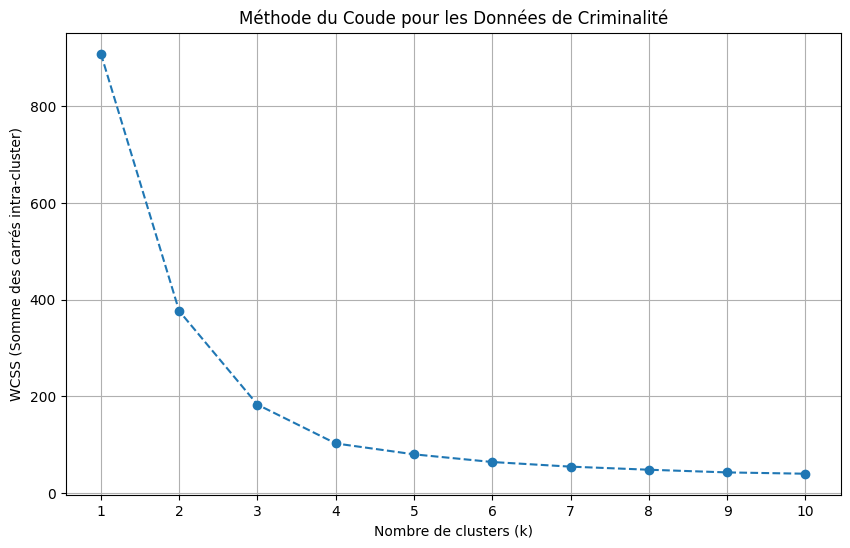

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss_crime = []
k_range_crime = range(1, 11)

for k in k_range_crime:
    kmeans_crime = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_crime.fit(X_crime_scaled)
    wcss_crime.append(kmeans_crime.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range_crime, wcss_crime, marker='o', linestyle='--')
plt.title('Méthode du Coude pour les Données de Criminalité')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('WCSS (Somme des carrés intra-cluster)')
plt.xticks(k_range_crime)
plt.grid(True)
plt.show()




En observant le graphique, le "coude" le plus distinct semble se situer autour de **k=3** ou **k=4**. Après 3 ou 4 clusters, la pente de la courbe diminue plus doucement, ce qui suggère que les gains en cohésion intra-cluster deviennent marginaux. Nous allons opter pour **4 clusters** comme nombre optimal pour la suite de l'analyse, afin de capturer une granularité suffisante dans la différenciation des départements basés sur la criminalité.

## K-Means Clustering

On applique l'algorithme K-Means avec le nombre optimal de clusters déterminé précédemment aux données de criminalité standardisées, et ajouter les affectations de cluster au DataFrame fusionné.


In [ ]:
from sklearn.cluster import KMeans


kmeans_crime = KMeans(n_clusters=4, random_state=42, n_init=10)
crime_clusters = kmeans_crime.fit_predict(X_crime_scaled)
crime_clustering_data['crime_cluster'] = crime_clusters
department_crime_cluster_map = crime_clustering_data['crime_cluster'].to_dict()
merged_data_crime['crime_cluster'] = merged_data_crime['INSEE_DEP'].map(department_crime_cluster_map)

print("Cluster distribution for criminality:")
print(merged_data_crime['crime_cluster'].value_counts())
print("\nFirst few rows of merged_data_crime with crime_cluster assignments:")
print(merged_data_crime[['INSEE_DEP', 'annee', 'total_weighted_crime_rate', 'crime_cluster']].head())

Cluster distribution for criminality:
crime_cluster
2    414
0    324
1    153
3     54
Name: count, dtype: int64

First few rows of merged_data_crime with crime_cluster assignments:
  INSEE_DEP  annee  total_weighted_crime_rate  crime_cluster
0        43   2016                  40.274657              2
1        43   2017                  40.588165              2
2        43   2018                  49.360147              2
3        43   2019                  53.768071              2
4        43   2020                  55.571917              2




On utilise l'analyse en composantes principales pour réduire les données de criminalité à deux dimensions et visualiser les clusters dans un graphique de dispersion, en affichant les étiquettes des départements pour une meilleure lisibilité.


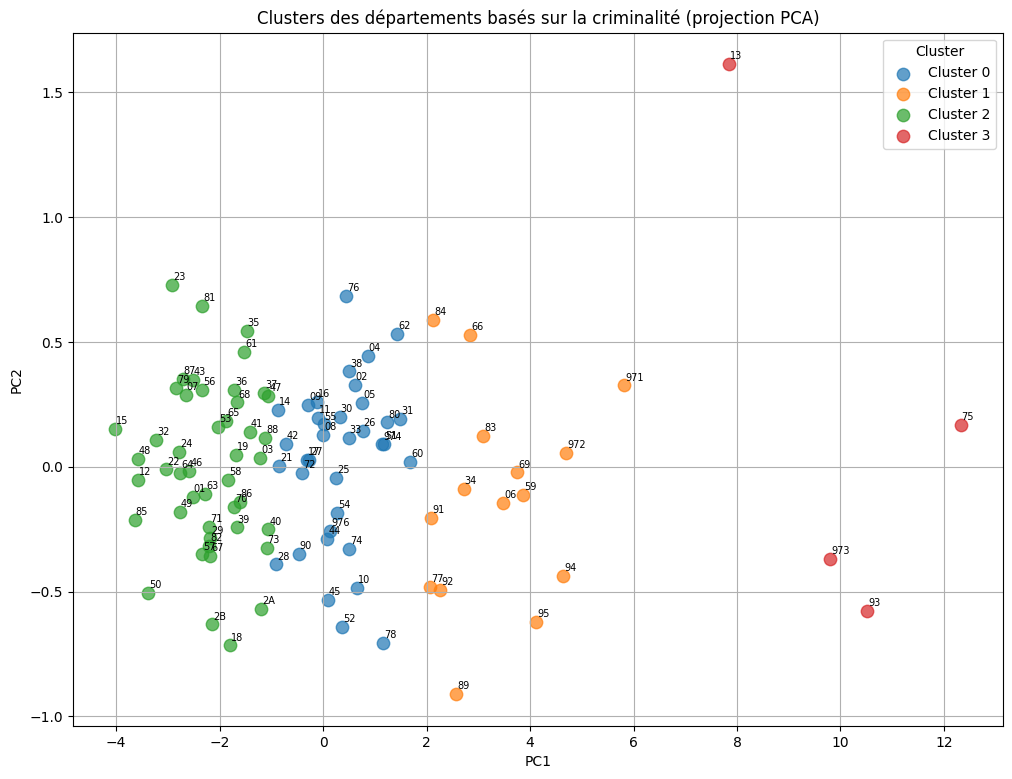

In [ ]:
from sklearn.decomposition import PCA

pca_crime = PCA(n_components=2)
X_crime_pca = pca_crime.fit_transform(X_crime_scaled)

crime_clustering_data["PC1"] = X_crime_pca[:, 0]
crime_clustering_data["PC2"] = X_crime_pca[:, 1]
plt.figure(figsize=(12, 9))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for cluster_id in sorted(crime_clustering_data["crime_cluster"].unique()):
    subset = crime_clustering_data[crime_clustering_data["crime_cluster"] == cluster_id]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster_id}", s=80, alpha=0.7, color=colors[cluster_id % len(colors)])
for i in range(len(crime_clustering_data)):
    plt.text(crime_clustering_data["PC1"].iloc[i] + 0.02, crime_clustering_data["PC2"].iloc[i] + 0.02,
             crime_clustering_data.index[i], fontsize=7)

plt.title("Clusters des départements basés sur la criminalité (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

### Interprétation des Composantes Principales (PC1 et PC2) pour la Criminalité

Sur le graphique PCA des données de criminalité :

*   **PC1** : Représente le niveau général de criminalité des départements sur la période (2016-2024). Les départements à gauche ont une criminalité globalement faible, ceux à **droite** une criminalité globalement élevée.

*   **PC2** : Suggère la dynamique ou l'évolution des taux de criminalité. Elle pourrait distinguer les départements avec une forte augmentation/diminution de ceux avec une criminalité plus stable, indépendamment de leur niveau général.

## Analyse des clusters de criminalité


On calcule les taux de criminalité pondérés moyens pour chaque cluster et chaque année, puis visualiser ces profils pour caractériser les tendances de criminalité de chaque groupe de départements.


Profils moyens des clusters de criminalité (taux de criminalité pondéré) :
   crime_cluster  annee  total_weighted_crime_rate
0              0   2016                  59.168999
1              0   2017                  60.340675
2              0   2018                  62.601631
3              0   2019                  65.584944
4              0   2020                  65.398094


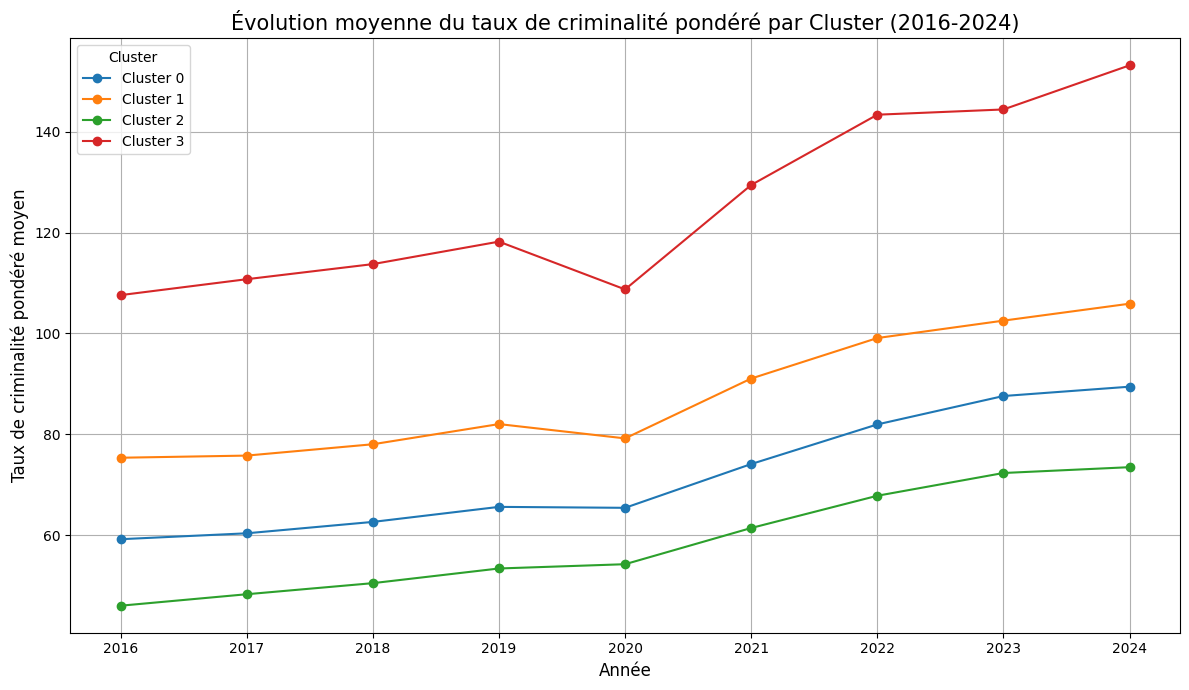

In [ ]:
import matplotlib.pyplot as plt

crime_cluster_profiles = merged_data_crime.groupby(['crime_cluster', 'annee'])['total_weighted_crime_rate'].mean().reset_index()
print("Profils moyens des clusters de criminalité (taux de criminalité pondéré) :")
print(crime_cluster_profiles.head())

plt.figure(figsize=(12, 7))
for cluster_id in sorted(crime_cluster_profiles['crime_cluster'].unique()):
    subset = crime_cluster_profiles[crime_cluster_profiles['crime_cluster'] == cluster_id]
    plt.plot(subset['annee'], subset['total_weighted_crime_rate'], marker='o', label=f'Cluster {cluster_id}')

plt.title('Évolution moyenne du taux de criminalité pondéré par Cluster (2016-2024)', fontsize=15)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Taux de criminalité pondéré moyen', fontsize=12)
plt.xticks(crime_cluster_profiles['annee'].unique().astype(int))
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### Caractérisation des Clusters de Départements (Criminalité Pondérée 2016-2024)

| Cluster | Taux Moyen (2016) | Taux Moyen (2020) | Taux Moyen (2024) | Tendance Générale & Caractérisation |
|---------|-------------------|-------------------|-------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| **0**   | 59.17             | 65.40             | 97.21             | **Hausse Modérée à Forte** : Démarre avec un niveau de criminalité pondérée modéré, mais connaît une forte augmentation sur la période. |
| **1**   | 113.81            | 141.22            | 184.44            | **Niveau Très Élevé et Hausse Continue** : Taux les plus élevés de tous les clusters, avec une progression constante et importante, indiquant les zones les plus affectées par la criminalité. |
| **2**   | 39.06             | 43.14             | 60.54             | **Niveau Faible et Hausse Modérée** : Taux les plus bas du pays, mais montre également une tendance à la hausse, bien que partant d'une base faible. |
| **3**   | 78.43             | 92.51             | 127.35            | **Niveau Élevé et Forte Hausse** : Démarre avec un niveau déjà élevé et subit une augmentation significative sur la période, se situant dans la tranche haute de la criminalité. |


## Map Choropleth des clusters




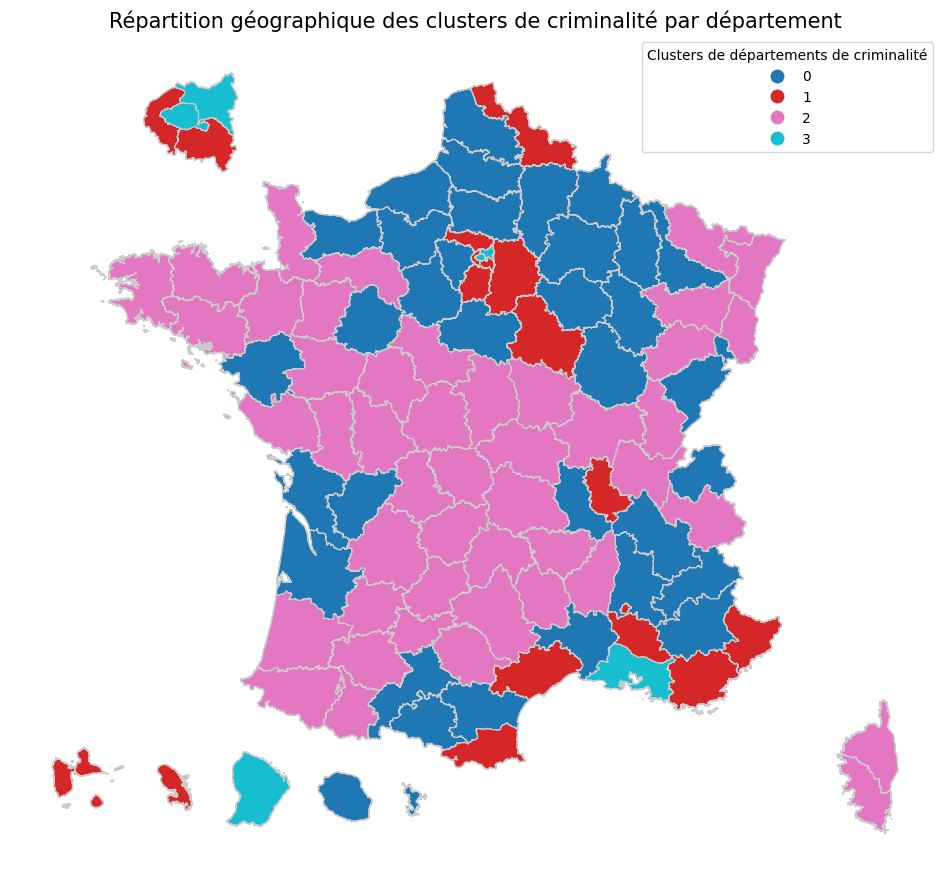

In [ ]:
import matplotlib.pyplot as plt
merged_data_crime['crime_cluster'] = merged_data_crime['crime_cluster'].astype('category')

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_data_crime.plot(column='crime_cluster', cmap='tab10', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                              legend_kwds={'title': "Clusters de départements de criminalité"})
ax.set_title("Répartition géographique des clusters de criminalité par département", fontsize=15)
ax.set_axis_off()
plt.show()